## Chapter 1: Software and packages 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

## Chapter 2: Basic operations on images

In [2]:
#2.1 Importing, drawing and displaying

In [2]:
img=cv2.imread("im0.png",1)

In [4]:
img[0][0]

array([ 50,  76, 123], dtype=uint8)

In [5]:
img[1,2]==93

True

In [2]:
def wind(image):  
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
wind(img)

In [7]:
imgCol=cv2.imread("im0.png",1)

In [17]:
wind(imgCol)

In [28]:
imgCol1=deepcopy(imgCol)
circle=cv2.circle(imgCol1,(780,1280),350,(125,50,39),20)
wind(circle)

In [12]:
imgN1=cv2.imread("double1.png",1)

In [30]:
wind(imgN)

In [14]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1)
#    print("2 seconds")
    if a==27:
        break
cv2.destroyAllWindows()

In [13]:
#2.2. Splitting channels, map algebra

In [18]:
wind(imgCol)

In [19]:
b,g,r=cv2.split(imgCol)

In [8]:
a=1

In [23]:
wind(r)

In [24]:
wind(r-b)

In [25]:
imgcol2=cv2.merge((b,g,r))

In [8]:
#2.3. Resizing, cropping and exporting

In [9]:
imgres=cv2.resize(imgCol,dsize=None,fx=0.2,fy=0.2,interpolation=cv2.INTER_CUBIC)

In [10]:
cv2.imshow("window",imgres)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
cropped=imgres[210:368,380:570]

In [12]:
wind(cropped)

In [13]:
cv2.imwrite("wheel.png",cropped)

True

## Chapter 3: Geometric operations on images 

In [14]:
#3.1 Image gradients

In [15]:
crops=cv2.imread("crops.png",0)

In [18]:
wind(crops)

In [19]:
sobelx=cv2.Sobel(crops,cv2.CV_8U,1,0,ksize=3)

In [20]:
wind(sobelx)

In [21]:
laplacian=cv2.Laplacian(crops,cv2.CV_8U)
wind(laplacian)

In [22]:
#3.2. Edge and feature detection

In [23]:
edges=cv2.Canny(crops,100,200)
wind(edges)

In [3]:
bbal=cv2.imread("basketball.jpg",1)
wind(bbal)

In [4]:
edges=cv2.Canny(bbal,150,400)
wind(edges)

In [7]:
lines=cv2.HoughLines(edges,5,5*np.pi/180,200)

In [8]:
lines

array([[[ 2.8000000e+02,  0.0000000e+00]],

       [[ 3.4000000e+02,  1.5707963e+00]],

       [[ 0.0000000e+00,  1.5707963e+00]],

       [[ 2.1000000e+02,  1.5707963e+00]],

       [[ 3.2000000e+02,  1.5707963e+00]],

       [[ 1.3000000e+02,  1.5707963e+00]],

       [[ 9.5000000e+01,  1.8325957e+00]],

       [[ 2.3000000e+02,  1.3962634e+00]],

       [[ 1.3000000e+02,  1.7453291e+00]],

       [[ 2.3000000e+02,  1.5707963e+00]],

       [[ 2.0500000e+02,  1.3962634e+00]],

       [[ 1.1000000e+02,  1.6580627e+00]],

       [[ 2.4000000e+02,  1.3089969e+00]],

       [[ 5.6000000e+02,  0.0000000e+00]],

       [[ 2.2000000e+02,  1.4835298e+00]],

       [[ 0.0000000e+00,  0.0000000e+00]],

       [[-3.0000000e+01,  2.0943952e+00]],

       [[ 1.6500000e+02,  1.4835298e+00]],

       [[ 2.5000000e+02,  1.0471976e+00]],

       [[ 4.5000000e+01,  2.0943952e+00]],

       [[ 1.7500000e+02,  1.6580627e+00]],

       [[-4.5000000e+01,  2.2689281e+00]],

       [[ 2.1500000e+02,  1.3962

In [33]:
for iterator in lines:
    rho=iterator[0][0]
    theta=iterator[0][1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(bbal,(x1,y1),(x2,y2),(0,0,255),2)

In [34]:
wind(bbal)

In [43]:
#3.3. A simple geocomputation application

In [44]:
imgN1=cv2.imread("double.png",1)

In [45]:
wind(imgN1)

In [46]:
diffs=np.array([[538,109],[1203,739],[758,137],[1240,467]])

In [47]:
def euclid(x1,x2,y1,y2):
    return int(np.sqrt((x1-x2)**2+(y1-y2)**2))

In [48]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if euclid(x,diff[0],y,diff[1])<15:
                cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1)
#    print("2 seconds")
    if a==27:
        break
cv2.destroyAllWindows()

## Chapter 4: Radiometric operations on images 

In [51]:
#4.1. Image colorspace and thresholding

In [52]:
hsv=cv2.cvtColor(imgN1,cv2.COLOR_BGR2HSV)

In [53]:
wind(hsv)

In [54]:
gray=cv2.cvtColor(imgN1,cv2.COLOR_BGR2GRAY)

In [55]:
wind(gray)

In [56]:
r,t=cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

In [57]:
r

100.0

In [58]:
t

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [59]:
wind(t)

In [3]:
#4.2. Image histogram

In [3]:
lena=cv2.imread("lena.jpg",0)

In [5]:
wind(lena)

In [4]:
hist=cv2.calcHist([lena],[0],None,[256],[0,256])

In [5]:
xaxis=np.arange(256).reshape(256,1)

In [6]:
histogram=np.hstack((xaxis,hist)).astype(int)

<function matplotlib.pyplot.show>

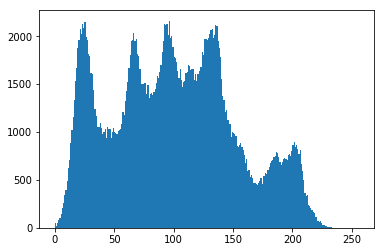

In [10]:
plt.hist(lena.flatten(),256,[0,256])
plt.show

In [15]:
equ=cv2.equalizeHist(lena)

In [16]:
wind(equ)

In [17]:
res=np.hstack((lena,equ))

In [18]:
wind(res)

In [19]:
#4.3. Convolution based operations

In [20]:
blur=cv2.blur(lena,(7,7))
wind(blur)

In [22]:
blurG=cv2.GaussianBlur(lena,(11,11),0)
wind(blurG)

In [23]:
res=np.hstack((lena,blurG))

In [24]:
wind(res)

In [25]:
#4.4. k-means classification

In [3]:
img=cv2.imread("im0.png",1)
#wind(img)

In [4]:
imgCL=np.float32(img.reshape((-1,3)))

In [7]:
imgCL=np.float32(img.reshape((-1,3)))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
K=4
ret,lab,center=cv2.kmeans(imgCL,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
#center=np.uint8(center)
#res=center[lab.flatten()]
#res2=res.reshape((img.shape))
#wind(res2)

## Chapter 5: An Earth Observation application 

In [37]:
pathB="C:/Users/thalia/Documents/1OpenCV course/code/before/"
pathA="C:/Users/thalia/Documents/1OpenCV course/code/after/"

In [48]:
BEF=[]
AFT=[]
for i in range(1,8):
    BEF.append(cv2.imread(pathB+"B"+str(i)+".tif",0)[4200:4700,2900:3500])
    AFT.append(cv2.imread(pathA+"B"+str(i)+".tif",0)[4200:4700,2900:3500])

In [53]:
BEF32=[]
AFT32=[]
for i in range(7):
    BEF32.append(np.float32(cv2.equalizeHist(BEF[i])))
    AFT32.append(np.float32(cv2.equalizeHist(AFT[i])))

In [56]:
before=cv2.merge((BEF32[0],BEF32[1],BEF32[2],BEF32[3],BEF32[4],BEF32[5],BEF32[6]))

In [72]:
beforeReady=before.reshape((-1,7))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1)
ret,label,center=cv2.kmeans(beforeReady,6,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((before.shape))

In [75]:
beforeF=deepcopy(res2[:][:,:,:3])

In [76]:
wind(beforeF)

In [77]:
after=cv2.merge((AFT32[0],AFT32[1],AFT32[2],AFT32[3],AFT32[4],AFT32[5],AFT32[6]))

In [78]:
afterReady=after.reshape((-1,7))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1)
ret,label,center=cv2.kmeans(afterReady,6,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((after.shape))
afterF=deepcopy(res2[:][:,:,:3])

In [79]:
wind(afterF)

In [80]:
beforeafter=np.hstack((beforeF,afterF))
wind(beforeafter)

In [82]:
d=0;q=0
for i in range(len(afterF)):
    for j in range(len(afterF[i])):
        if np.sum(afterF[i][j])==510:
            d+=1
            if (np.sum(beforeF[i][j])==369 or np.sum(beforeF[i][j])==251):
                q+=1
print ("Total burned area:",d*900,"square meters")
print ("Forest burned area:",q*900,"square meters")

Total burned area: 29994300 square meters
Forest burned area: 20204100 square meters
